In [22]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import requests
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from panel.interact import interact
import holoviews as hv

In [23]:
load_dotenv()

True

In [24]:
start_date = pd.Timestamp('2015-02-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-13', tz='America/New_York').isoformat()

In [25]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [26]:
tickers = ['SPLV','SCHD','PHO','AOA','AAPL','ICLN',]
timeframe = "1D"
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

#df_tickers.tz_convert('US/Pacific')

df_tickers

AAPL                                           \
                               open      high       low     close     volume   
time                                                                           
2015-02-04 00:00:00-05:00  118.5000  120.5100  118.3100  119.5500   63181345   
2015-02-05 00:00:00-05:00  120.0200  120.2300  119.2500  119.9400   36157432   
2015-02-06 00:00:00-05:00  120.0500  120.2500  118.4500  118.9100   38899318   
2015-02-09 00:00:00-05:00  118.5500  119.8400  118.4300  119.7200   33755237   
2015-02-10 00:00:00-05:00  120.1700  122.1500  120.1600  122.0200   52811215   
2015-02-11 00:00:00-05:00  122.8600  124.9200  122.5000  124.8700   64917482   
2015-02-12 00:00:00-05:00  126.0600  127.4800  125.5700  126.4300   65727045   
2015-02-13 00:00:00-05:00  127.2800  127.2800  125.6500  127.0800   46474284   
2015-02-17 00:00:00-05:00  127.3700  128.8800  126.9200  127.8200   54899122   
2015-02-18 00:00:00-05:00  127.5800  128.7800  127.4500  128.7200   38502166   
2015-02-19 00:00:00-05:00  128.4600  129.0300  128.3300  128.4600   33150709   
2015-02-20 00:00:00-05:00  128.6200  129.5000  128.0500  129.5000   42471189   
2015-02-23 00:00:00-05:00  130.0374  133.0080  129.6674  132.9830   58447081   
2015-02-24 00:00:00-05:00  132.9500  133.6000  131.1700  132.1800   61964367   
2015-02-25 00:00:00-05:00  131.5600  131.6000  128.1500  128.7800   67439953   
2015-02-26 00:00:00-05:00  128.8300  130.8700  126.6100  130.4100   81405180   
2015-02-27 00:00:00-05:00  130.0000  130.5700  128.2400  128.4700   50079079   
2015-03-02 00:00:00-05:00  129.2400  130.2800  128.3000  129.0800   41274277   
2015-03-03 00:00:00-05:00  128.9700  129.5200  128.0900  129.3800   32843947   
2015-03-04 00:00:00-05:00  129.1000  129.5600  128.3200  128.5600   26198737   
2015-03-05 00:00:00-05:00  128.5800  128.7500  125.7600  126.4000   50029198   
2015-03-06 00:00:00-05:00  128.4900  129.3700  126.2600  126.5900   62103198   
2015-03-09 00:00:00-04:00  127.9800  129.5700  125.0600  127.1100   80170256   
2015-03-10 00:00:00-04:00  126.4700  127.2200  123.8000  124.5200   57143570   
2015-03-11 00:00:00-04:00  124.7500  124.7700  122.1100  122.2500   61180175   
2015-03-12 00:00:00-04:00  122.3100  124.9000  121.6300  124.4400   41472999   
2015-03-13 00:00:00-04:00  124.4000  125.4000  122.5800  123.5900   44947077   
2015-03-16 00:00:00-04:00  123.8800  124.9600  122.8700  124.9500   29483536   
2015-03-17 00:00:00-04:00  125.9000  127.3200  125.6500  127.0500   44418357   
2015-03-18 00:00:00-04:00  127.0300  129.1600  126.3700  128.4700   49995164   
...                             ...       ...       ...       ...        ...   
2020-10-05 00:00:00-04:00  113.9200  116.6500  113.5500  116.5400   93972780   
2020-10-06 00:00:00-04:00  115.7000  116.1200  112.2500  113.1600  142211773   
2020-10-07 00:00:00-04:00  114.6200  115.5100  114.1300  115.0500   84487218   
2020-10-08 00:00:00-04:00  116.2700  116.4000  114.5901  114.9700   74552335   
2020-10-09 00:00:00-04:00  115.2800  117.0000  114.9200  116.9800   86041259   
2020-10-12 00:00:00-04:00  120.0600  125.1800  119.2845  124.4200  214339341   
2020-10-13 00:00:00-04:00  125.2700  125.3900  119.6500  121.0500  241006181   
2020-10-14 00:00:00-04:00  120.9900  123.0300  119.6200  121.2900  135410215   
2020-10-15 00:00:00-04:00  118.7200  121.2000  118.1500  120.7453   97361453   
2020-10-16 00:00:00-04:00  121.2800  121.5480  118.8100  118.9600  100869315   
2020-10-19 00:00:00-04:00  119.9600  120.4190  115.6600  116.0000   95733407   
2020-10-20 00:00:00-04:00  116.1900  118.9800  115.6300  117.5000  108602099   
2020-10-21 00:00:00-04:00  116.6700  118.7050  116.4500  116.8600   69861622   
2020-10-22 00:00:00-04:00  117.4500  118.0400  114.5900  115.7737   90327115   
2020-10-23 00:00:00-04:00  116.3900  116.5500  114.2800  115.0400   73088651   
2020-10-26 00:00:00-04:00  114.0100  116.5500  112.8800  115.0600   94591584   
2020-10-27 00:00:00-04:00  115.

In [27]:
MC_five_year = MCSimulation(
    portfolio_data = df_tickers,
    weights = [1/6]*6,
    num_simulation = 500,
    num_trading_days = 252 * 3
)   

In [28]:
MC_five_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2015-02-04 00:00:00-05:00  118.50  120.51  118.31  119.55  63181345   
2015-02-05 00:00:00-05:00  120.02  120.23  119.25  119.94  36157432   
2015-02-06 00:00:00-05:00  120.05  120.25  118.45  118.91  38899318   
2015-02-09 00:00:00-05:00  118.55  119.84  118.43  119.72  33755237   
2015-02-10 00:00:00-05:00  120.17  122.15  120.16  122.02  52811215   

                                          AOA                             ...  \
                          daily_return   open     high      low    close  ...   
time                                                                      ...   
2015-02-04 00:00:00-05:00          NaN  46.60  46.7991  46.5100  46.5201  ...   
2015-02-05 00:00:00-05:00     0.003262  46.85  47.0000  46.5100  46.9800  ...   
2015-02-06 00:00:00-05:00    -0.008588  46.93  46.9300  46.5664  46.6100  ...   
2015-02-09 00:00:00-05:00     0.006812  46.50  46.5999  46.3401  46.4500  ...   
2015-02-10 00:00:00-05:00     0.019211  46.70  46.8000  46.4908  46.7600  ...   

                              SCHD                                 SPLV  \
                               low  close    volume daily_return   open   
time                                                                      
2015-02-04 00:00:00-05:00  39.5800  39.66  407412.0          NaN  38.44   
2015-02-05 00:00:00-05:00  39.8390  40.05  293999.0     0.009834  38.55   
2015-02-06 00:00:00-05:00  39.9000  40.00  471370.0    -0.001248  38.81   
2015-02-09 00:00:00-05:00  39.7249  39.83  314369.0    -0.004250  38.24   
2015-02-10 00:00:00-05:00  39.8790  40.22  304559.0     0.009792  38.19   

                                                                          
                              high    low  close     volume daily_return  
time                                                                      
2015-02-04 00:00:00-05:00  38.6000  38.30  38.38  1955443.0          NaN  
2015-02-05 00:00:00-05:00  38.7800  38.47  38.77  1345649.0     0.010162  
2015-02-06 00:00:00-05:00  38.8100  38.11  38.25  2149772.0    -0.013412  
2015-02-09 00:00:00-05:00  38.2500  37.92  38.03  1490770.0    -0.005752  
2015-02-10 00:00:00-05:00  38.4167  38.03  38.38   863987.0     0.009203  

[5 rows x 36 columns]

In [29]:
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988024,1.001001,1.001033,1.007643,1.003326,0.984406,0.994193,1.004020,0.999508,0.999029,...,1.002232,1.002890,1.001570,1.003369,1.007949,0.996030,0.999935,1.004738,1.005320,0.997860
2,0.976311,1.011106,1.006610,1.012147,1.000639,0.983481,1.000468,0.994436,0.997627,1.000054,...,1.004870,1.006993,0.998471,1.007713,1.006669,0.996638,0.999101,1.001368,1.003722,0.996470
3,0.971925,1.015156,1.002440,1.010017,0.999850,0.985163,1.002484,0.981937,1.004076,1.001422,...,0.987877,1.021059,0.999194,1.000201,1.014603,0.989407,1.013396,1.000230,1.001651,0.986911
4,0.975221,1.012057,1.009043,1.004054,0.999395,0.991017,1.010603,0.980973,1.011877,1.009718,...,0.991613,1.023120,1.001201,0.989982,1.012239,0.986911,1.009418,1.009265,1.013153,0.983343
5,0.974353,1.000746,1.010931,1.016154,1.000339,0.987570,1.005293,0.974720,1.021970,1.006341,...,0.995184,1.033990,1.013826,0.980818,1.006232,0.992232,1.001406,1.013115,1.014056,0.981846
6,0.974303,0.994748,1.004433,1.026243,1.005240,0.984131,1.011734,0.971169,1.022290,1.007284,...,1.006694,1.032450,1.010487,0.997577,1.014066,0.989702,1.001263,1.014239,1.018559,0.985036
7,0.976275,1.003630,1.020333,1.024397,1.007053,0.982744,0.997312,0.972028,1.026465,1.004870,...,1.010613,1.032383,1.007939,1.005739,1.020716,0.988674,0.996371,1.020096,1.016758,0.978672
8,0.967538,1.006903,1.023951,1.022831,1.016747,0.992018,0.992273,0.965335,1.032637,1.003757,...,1.000699,1.042321,1.000589,1.002609,1.013313,0.976384,0.992939,1.016741,1.022968,0.981821
9,0.969427,1.007457,1.015491,1.019935,1.013238,0.996317,0.991891,0.968485,1.044804,1.002496,...,0.990473,1.033428,1.001322,1.001622,1.023690,0.966654,1.000918,1.028768,1.023396,0.986512


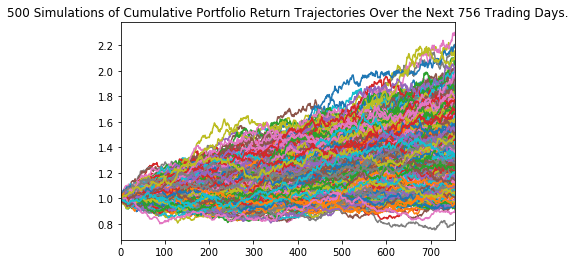

In [30]:
line_plot = MC_five_year.plot_simulation()

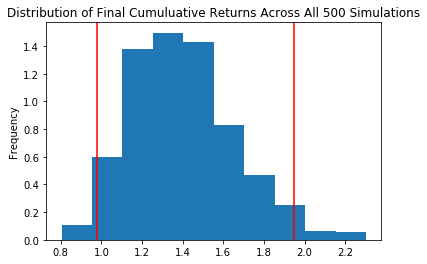

In [31]:
MC_five_year.plot_distribution()

In [32]:
portfolio_tbl = MC_five_year.summarize_cumulative_return()
print(portfolio_tbl)

count           500.000000
mean              1.400733
std               0.253274
min               0.804140
25%               1.215540
50%               1.370632
75%               1.551588
max               2.301514
95% CI Lower      0.980815
95% CI Upper      1.946253
Name: 756, dtype: float64


In [33]:
initial_investment = 10000


ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)

ci_lower = ('${0:,.0f}').format(ci_lower)
ci_upper = ('${0:,.0f}').format(ci_upper)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" {ci_lower} and {ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within the range of $9,808 and $19,463


In [34]:
df_closing_prices = pd.DataFrame()
for ticker in tickers:
    df_closing_prices[ticker] = df_tickers[ticker]['close']
    
df_closing_prices.head()

,SPLV,SCHD,PHO,AOA,AAPL,ICLN
time,,,,,,
2015-02-04 00:00:00-05:00,38.38,39.66,24.75,46.5201,119.55,10.44
2015-02-05 00:00:00-05:00,38.77,40.05,25.04,46.9800,119.94,10.53
2015-02-06 00:00:00-05:00,38.25,40.00,24.91,46.6100,118.91,10.40
2015-02-09 00:00:00-05:00,38.03,39.83,24.91,46.4500,119.72,10.42
2015-02-10 00:00:00-05:00,38.38,40.22,24.94,46.7600,122.02,10.50


In [35]:
df_dialy_returns = df_closing_prices.pct_change().dropna()
df_dialy_returns.head()

,SPLV,SCHD,PHO,AOA,AAPL,ICLN
time,,,,,,
2015-02-05 00:00:00-05:00,0.010162,0.009834,0.011717,0.009886,0.003262,0.008621
2015-02-06 00:00:00-05:00,-0.013412,-0.001248,-0.005192,-0.007876,-0.008588,-0.012346
2015-02-09 00:00:00-05:00,-0.005752,-0.004250,0.000000,-0.003433,0.006812,0.001923
2015-02-10 00:00:00-05:00,0.009203,0.009792,0.001204,0.006674,0.019211,0.007678
2015-02-11 00:00:00-05:00,-0.004169,0.000000,-0.005213,-0.001497,0.023357,-0.004476


In [36]:
weights = [1/6]*6
weighted_returns_portfolio = df_dialy_returns.dot(weights).to_frame()
weighted_returns_portfolio.head()
portfolio_PE = weighted_returns_portfolio.rename(columns = {0: ' Portfolio PE'})
portfolio_PE.index = portfolio_PE.index.date
portfolio_PE.head()

,Portfolio PE
2015-02-05,0.008914
2015-02-06,-0.008110
2015-02-09,-0.000783
2015-02-10,0.008960
2015-02-11,0.001334


In [37]:
portfolio_PE.index.name = 'Time'
portfolio_PE.head()

,Portfolio PE
Time,
2015-02-05,0.008914
2015-02-06,-0.008110
2015-02-09,-0.000783
2015-02-10,0.008960
2015-02-11,0.001334


In [38]:
portfolio_PE.hvplot.line(
    x='Time',
    y=" Portfolio PE",
    xlabel="Date",
    ylabel="Daily Return",
    title=" Portfolio PE Daily Returns",
)

:Curve   [Time]   ( Portfolio PE)

In [39]:
portfolio_PE_cr = (1+portfolio_PE).cumprod()
portfolio_PE_cr.head()

,Portfolio PE
Time,
2015-02-05,1.008914
2015-02-06,1.000731
2015-02-09,0.999947
2015-02-10,1.008907
2015-02-11,1.010253


In [40]:
portfolio_PE_cr.hvplot.line(
    x='Time',
    y=" Portfolio PE",
    xlabel="Date",
    ylabel="Cumulative Return",
    title="Portfolio PE Cumulative Returns",
)

:Curve   [Time]   ( Portfolio PE)

In [41]:
NASDAQ_df = pd.read_csv(Path("NASDAQ.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
NASDAQ_df.sort_index()
#NASDAQ_df.tz_convert('US/Pacific')
#NASDAQ_df = NASDAQ_df.tz_localize('NASDAQ')
NASDAQ_df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02 16:00:00,6937.65,7006.91,6924.08,7006.90,0
2018-01-03 16:00:00,7017.07,7069.15,7016.70,7065.53,0
2018-01-04 16:00:00,7089.50,7098.05,7072.38,7077.92,0
2018-01-05 16:00:00,7105.74,7137.04,7097.08,7136.56,0
2018-01-08 16:00:00,7135.38,7161.35,7124.09,7157.39,0


In [42]:
NASDAQ_columns = ['open','high','low','close','volume']
NASDAQ_df.columns = NASDAQ_columns
#NASDAQ_df = NASDAQ_df.tz_localize('NASDAQ')
NASDAQ_df.head()

,open,high,low,close,volume
Date,,,,,
2018-01-02 16:00:00,6937.65,7006.91,6924.08,7006.90,0
2018-01-03 16:00:00,7017.07,7069.15,7016.70,7065.53,0
2018-01-04 16:00:00,7089.50,7098.05,7072.38,7077.92,0
2018-01-05 16:00:00,7105.74,7137.04,7097.08,7136.56,0
2018-01-08 16:00:00,7135.38,7161.35,7124.09,7157.39,0


In [43]:
index_NASDAQ = pd.MultiIndex.from_tuples(
    [
        ('NASDAQ',   'open'),
        ('NASDAQ',   'high'),
        ('NASDAQ',    'low'),
        ('NASDAQ',  'close'),
        ('NASDAQ', 'volume')
    ],
)
index_NASDAQ

MultiIndex(levels=[['NASDAQ'], ['close', 'high', 'low', 'open', 'volume']],
           codes=[[0, 0, 0, 0, 0], [3, 1, 2, 0, 4]])

In [44]:
NASDAQ_df.columns = index_NASDAQ
NASDAQ_df.index.name = None
#NASDAQ_df = NASDAQ_df.tz_localize('NASDAQ')
NASDAQ_df.head()

NASDAQ                                  
                        open     high      low    close volume
2018-01-02 16:00:00  6937.65  7006.91  6924.08  7006.90      0
2018-01-03 16:00:00  7017.07  7069.15  7016.70  7065.53      0
2018-01-04 16:00:00  7089.50  7098.05  7072.38  7077.92      0
2018-01-05 16:00:00  7105.74  7137.04  7097.08  7136.56      0
2018-01-08 16:00:00  7135.38  7161.35  7124.09  7157.39      0

In [45]:
MC_NASDAQ = MCSimulation(
    portfolio_data = NASDAQ_df,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_NASDAQ.portfolio_data.head()

NASDAQ                                               
                        open     high      low    close volume daily_return
2018-01-02 16:00:00  6937.65  7006.91  6924.08  7006.90      0          NaN
2018-01-03 16:00:00  7017.07  7069.15  7016.70  7065.53      0     0.008367
2018-01-04 16:00:00  7089.50  7098.05  7072.38  7077.92      0     0.001754
2018-01-05 16:00:00  7105.74  7137.04  7097.08  7136.56      0     0.008285
2018-01-08 16:00:00  7135.38  7161.35  7124.09  7157.39      0     0.002919

In [46]:
MC_NASDAQ.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998102,0.983935,1.005099,1.006130,0.979318,0.971004,1.024891,1.042314,1.003394,1.003236,...,0.993317,1.025276,1.010246,1.001341,0.979918,1.004325,1.008967,0.994634,1.018404,1.019470
2,1.010685,0.957608,1.014591,0.995043,0.959462,0.974950,1.017130,1.066789,0.969781,0.985067,...,1.004769,1.014221,1.007548,0.988584,0.996338,1.016790,1.012173,1.002560,1.032863,1.032362
3,1.020018,0.971296,0.999539,0.985104,0.961584,0.974210,1.019440,1.037790,0.955590,0.947934,...,0.990967,1.009760,1.015918,0.992750,1.010626,1.011187,0.990488,0.967549,1.045160,1.023754
4,1.007865,0.987421,0.998811,0.978044,0.950755,0.988693,1.045264,1.044418,0.937485,0.958156,...,0.975370,1.031808,1.013201,0.969664,0.994994,0.990364,0.984808,0.988740,1.043483,1.010179
5,1.018136,1.000552,1.019730,0.969723,0.962686,0.977072,1.046518,1.029696,0.941954,0.951093,...,0.980629,1.071369,0.997705,0.971137,1.033428,1.006019,1.003803,1.034570,1.053979,1.009406
6,1.014864,0.991942,1.045200,0.965548,0.959184,0.970931,1.037163,1.012532,0.947727,0.928265,...,0.972602,1.082187,1.001521,0.992258,1.003475,0.986676,1.037718,1.025463,1.032467,1.047906
7,1.003247,0.994303,1.052477,0.969765,0.946942,0.956958,1.041400,0.991528,0.953097,0.929666,...,0.980593,1.072647,0.972208,0.982645,1.005581,0.963031,1.055223,1.036821,1.046239,1.036895
8,1.033764,1.009855,1.055474,0.989020,0.957866,0.996477,1.033383,0.988409,0.970610,0.928792,...,0.995492,1.103222,0.954257,0.964455,1.020805,0.979636,1.070035,1.048761,1.049559,0.998112
9,1.016584,1.037581,1.063781,0.992530,0.976707,0.979102,1.031561,0.983621,1.021366,0.950757,...,1.011438,1.079222,0.934416,0.950732,0.999483,0.976648,1.054499,1.061440,1.028683,1.026965


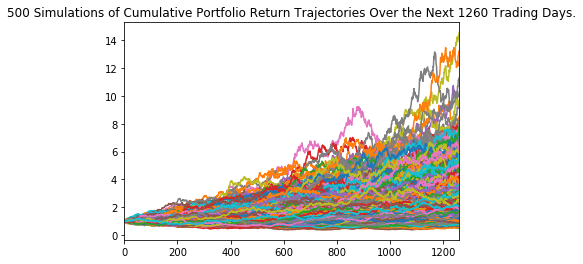

In [47]:
MC_NASDAQ.plot_simulation()

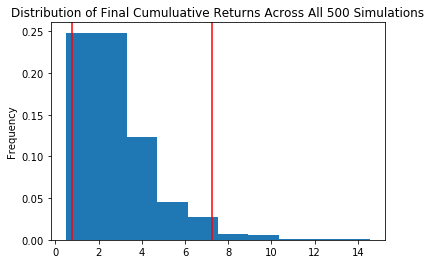

In [48]:
MC_NASDAQ.plot_distribution()

In [49]:
NASDAQ_plt =pd.DataFrame()
NASDAQ_plt['NAS'] = NASDAQ_df['NASDAQ']['close']
NASDAQ_plt.head()

,NAS
2018-01-02 16:00:00,7006.90
2018-01-03 16:00:00,7065.53
2018-01-04 16:00:00,7077.92
2018-01-05 16:00:00,7136.56
2018-01-08 16:00:00,7157.39


In [50]:
NASDAQ_dr = NASDAQ_plt.pct_change().dropna()
NASDAQ_dr.head()

,NAS
2018-01-03 16:00:00,0.008367
2018-01-04 16:00:00,0.001754
2018-01-05 16:00:00,0.008285
2018-01-08 16:00:00,0.002919
2018-01-09 16:00:00,0.000865


In [51]:
NASDAQ_cr = (1+NASDAQ_dr).cumprod()
NASDAQ_cr.head()

,NAS
2018-01-03 16:00:00,1.008367
2018-01-04 16:00:00,1.010136
2018-01-05 16:00:00,1.018505
2018-01-08 16:00:00,1.021477
2018-01-09 16:00:00,1.022361


In [52]:
NASDAQ_cr.hvplot.line()

:Curve   [index]   (NAS)

In [53]:
NASDAQ_df.index = NASDAQ_df.index.date
NASDAQ_df.head()

NASDAQ                                  
               open     high      low    close volume
2018-01-02  6937.65  7006.91  6924.08  7006.90      0
2018-01-03  7017.07  7069.15  7016.70  7065.53      0
2018-01-04  7089.50  7098.05  7072.38  7077.92      0
2018-01-05  7105.74  7137.04  7097.08  7136.56      0
2018-01-08  7135.38  7161.35  7124.09  7157.39      0

In [54]:
df_tickers.index = df_tickers.index.date
df_tickers.head()

AAPL                                      AOA                    \
              open    high     low   close    volume   open     high      low   
2015-02-04  118.50  120.51  118.31  119.55  63181345  46.60  46.7991  46.5100   
2015-02-05  120.02  120.23  119.25  119.94  36157432  46.85  47.0000  46.5100   
2015-02-06  120.05  120.25  118.45  118.91  38899318  46.93  46.9300  46.5664   
2015-02-09  118.55  119.84  118.43  119.72  33755237  46.50  46.5999  46.3401   
2015-02-10  120.17  122.15  120.16  122.02  52811215  46.70  46.8000  46.4908   

                              ...   SCHD                                     \
              close   volume  ...   open     high      low  close    volume   
2015-02-04  46.5201  27727.0  ...  39.64  39.9000  39.5800  39.66  407412.0   
2015-02-05  46.9800  26503.0  ...  39.90  40.0700  39.8390  40.05  293999.0   
2015-02-06  46.6100  35938.0  ...  40.15  40.2300  39.9000  40.00  471370.0   
2015-02-09  46.4500  39580.0  ...  39.92  40.0200  39.7249  39.83  314369.0   
2015-02-10  46.7600  24610.0  ...  40.11  40.2668  39.8790  40.22  304559.0   

             SPLV                                    
             open     high    low  close     volume  
2015-02-04  38.44  38.6000  38.30  38.38  1955443.0  
2015-02-05  38.55  38.7800  38.47  38.77  1345649.0  
2015-02-06  38.81  38.8100  38.11  38.25  2149772.0  
2015-02-09  38.24  38.2500  37.92  38.03  1490770.0  
2015-02-10  38.19  38.4167  38.03  38.38   863987.0  

[5 rows x 30 columns]

In [55]:
#joined_df = pd.concat([NASDAQ_df, df_tickers], axis = "columns", join = "inner")
#joined_df = joined.drop(columns=['open, high, low, vloume']
#joined_df.head().

In [56]:
NASDAQ_cr.index = NASDAQ_cr.index.date
plot_df = pd.concat([portfolio_PE_cr, NASDAQ_cr], axis = 1, join = 'inner')
plot_df.head()

,Portfolio PE,NAS
2018-01-03,1.235362,1.008367
2018-01-04,1.238269,1.010136
2018-01-05,1.245357,1.018505
2018-01-08,1.250064,1.021477
2018-01-09,1.249958,1.022361


In [57]:
plot_df.hvplot(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

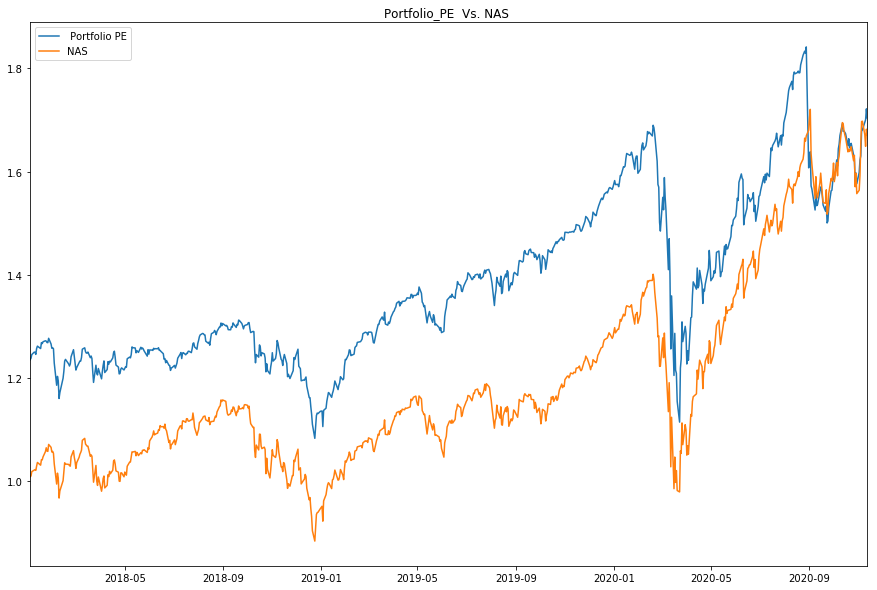

In [39]:
plot_df.plot(title="Portfolio_PE  Vs. NAS ", figsize=(15,10), legend=True)
